![](https://cdn.pixabay.com/photo/2016/11/18/17/46/architecture-1836070_1280.jpg)

**REAL ESTATE-HOME PRICE PREDICTOR**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


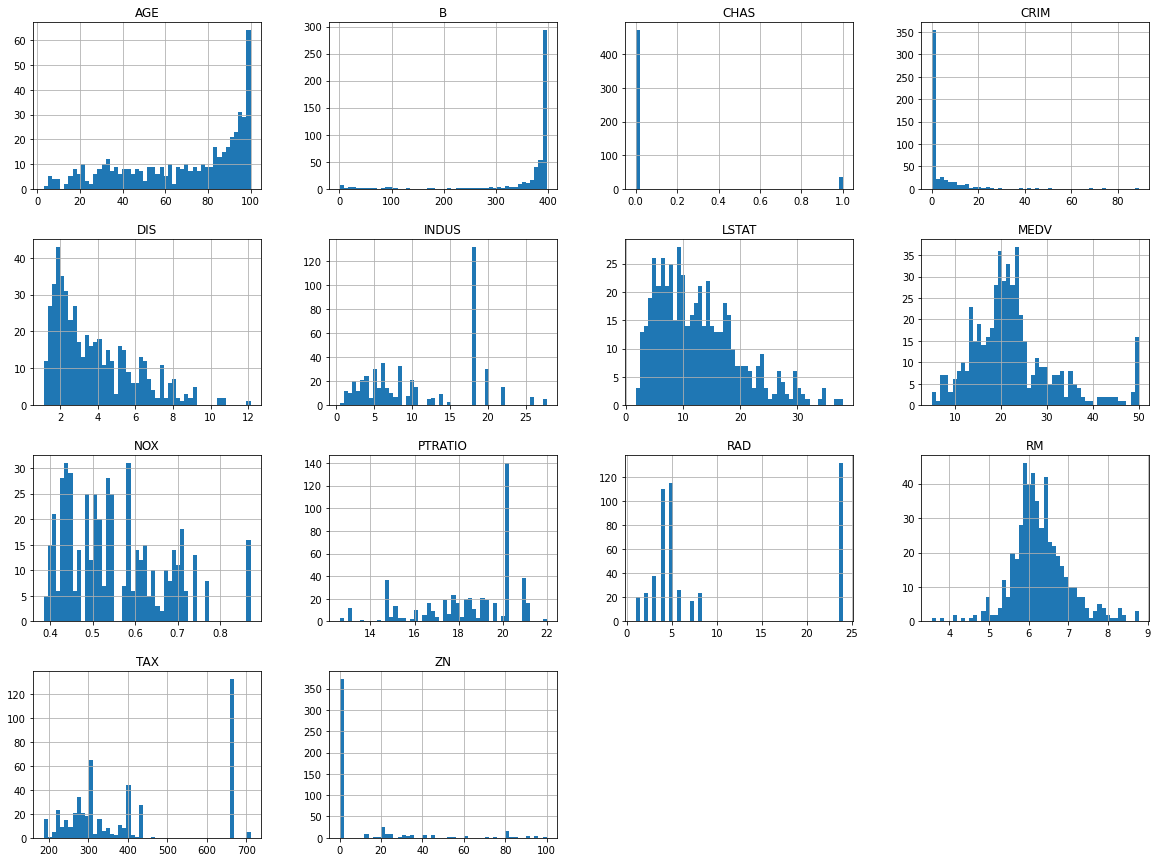

In [ ]:
df.hist(bins=50,figsize=(20,15))
plt.show()

**TRAIN-TEST SPLITTING**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['CHAS']):
  train_set = df.loc[train_index]
  test_set = df.loc[test_index]

In [ ]:
len(train_set)

404

In [ ]:
len(test_set)

102

In [ ]:
x_train = train_set.drop('MEDV',axis=1)
y_train = train_set['MEDV']


In [ ]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [ ]:
y_train.head()

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

**GENERATING PIPELINE**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
           ('imputer', SimpleImputer(strategy='median')),
           ('std_scale', StandardScaler())             

])

In [ ]:
x_train1 = my_pipeline.fit_transform(x_train)

**SELECTION OF DESIRED MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**EVALUATION OF MODEL - CROSS VALIDATION**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train1, y_train, scoring='neg_mean_squared_error', cv=10)
rms_scores = np.sqrt(-scores)

In [ ]:
rms_scores

array([2.75551058, 2.77489064, 4.57013382, 2.56476109, 3.74822887,
       2.72725444, 5.10637023, 3.40311632, 3.57145735, 3.35613398])

In [ ]:
def print_scores(scores):
  print('scores:', scores)
  print('scores.mean:', scores.mean())
  print('scores.std:', scores.std())

In [ ]:
print_scores(rms_scores)

scores: [2.75551058 2.77489064 4.57013382 2.56476109 3.74822887 2.72725444
 5.10637023 3.40311632 3.57145735 3.35613398]
scores.mean: 3.4577857296867416
scores.std: 0.7972737576948533


In [ ]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4


**TESTING MODEL**

In [ ]:
x_test = test_set.drop('MEDV',axis=1)
y_test = test_set['MEDV']

In [ ]:
X_test_prep = my_pipeline.transform(x_test)

In [ ]:
model.predict(X_test_prep)

array([24.969, 10.72 , 25.366, 22.251, 18.1  , 15.051, 20.003, 14.704,
       31.619, 41.937, 19.394, 11.601, 25.03 , 26.922, 19.459, 11.129,
       31.24 , 14.336, 23.725, 19.352, 19.81 , 17.878, 16.707, 22.022,
       18.77 , 31.578, 15.969, 32.951,  8.965, 33.58 , 24.484, 21.462,
       23.145, 10.192, 20.941, 11.16 , 42.98 , 24.674, 23.13 , 42.004,
       24.076, 29.819, 20.58 , 21.04 , 18.705, 32.915, 44.233, 20.278,
       20.025, 21.454, 21.369, 14.671, 21.367, 14.976, 25.588, 33.479,
       42.384, 28.689, 18.855, 20.996, 46.692,  9.826, 19.138, 25.484,
       14.7  , 32.664, 19.953, 17.855, 18.943, 34.418, 25.8  , 22.958,
       20.824, 22.463, 33.919, 13.024, 15.93 , 19.84 , 21.078, 21.78 ,
       22.481, 21.293, 14.424, 22.924, 20.72 , 21.189, 13.823, 21.724,
       21.89 , 23.67 , 18.298, 26.974,  7.232, 27.001, 18.987, 29.751,
       19.916, 30.514, 14.584, 26.559, 20.636, 19.705])

In [71]:
y_test

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

In [ ]:
model.score(X_test_prep,y_test)

0.8790716209236162

**SAVING MODEL**

In [ ]:
import pickle

In [ ]:
with open('price_predictor_model.pickle','wb') as f:
  pickle.dump(model, f)

**USING MODEL**

In [72]:
features = np.array([[0.02498,	0.0,	1.89,	0,	0.518,	6.540,	59.7,	6.2669,	1,	422,	15.9,	389.96,	8.65]])

In [73]:
model.predict(features)

array([22.365])